In [ ]:
!pip install torch torchvision

In [ ]:
import torch
import matplotlib.pyplot as plt

images = ['cat.png','beemo.jpg','gunter.png','kirby.jpg','dog.jpg']

with open('imagenet.txt') as f:
    class_names=[lines.strip() for lines in f]


# import torch
# import torchvision.transforms as transforms
# size = (224,224)
# mean_values = [0.485, 0.456, 0.406]
# std_values = [0.229, 0.224, 0.225]

# # Define the composed transformation
# preprocess = transforms.Compose([
#     transforms.Resize(size),
#     transforms.CenterCrop(size),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=mean_values, std=std_values)
# ])

# # Define the composed transformation (without normalization)
# preprocess_WN = transforms.Compose([
#     transforms.Resize(size),
#     transforms.CenterCrop(size),
#     transforms.ToTensor()
# ])

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn.functional as F
from PIL import Image

# Constants
size = (224, 224)
mean_values = [0.485, 0.456, 0.406]
std_values = [0.229, 0.224, 0.225]

# Define the composed transformation
preprocess = transforms.Compose([
    transforms.Resize(size),
    transforms.CenterCrop(size),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean_values, std=std_values)
])

# Load ResNet Model
resnet = models.resnet101(pretrained=True)
resnet.eval()
print("with normalisation ")
# Processing images
correct_predictions = 0  # This variable was declared but not used in your initial code.
total_predictions = len(images)
x = 0  # This variable was declared but not used in your initial code.

for i in range(len(images)):
    # Load and convert image to RGB if not already
    A = Image.open(images[i])
    if A.mode != 'RGB':
        A = A.convert('RGB')
    # Transform and feed to ResNet
    transformed_image = preprocess(A)
    image_batch = transformed_image.unsqueeze(0)
    with torch.no_grad():
        output = resnet(image_batch)
    # Get prediction
    _, index = torch.max(output, 1)
    percentages = F.softmax(output, dim=1)[0] * 100


    print('given input image : ', images[i][:-4])
    print("predd : ", class_names[index], percentages[index].item())



with normalisation 
given input image :  cat
predd :  loupe, jeweler's loupe 44.99162673950195
given input image :  beemo
predd :  desktop computer 24.837114334106445
given input image :  gunter
predd :  comic book 33.08618927001953
given input image :  kirby
predd :  piggy bank, penny bank 99.34442138671875
given input image :  dog
predd :  golden retriever 98.97611999511719


In [ ]:
# # with normalization
# import torch
# import torchvision.transforms as transforms
# import torchvision.models as models
# import torch.nn.functional as F
# from PIL import Image
# resnet=models.resnet101(pretrained=True)
# resnet.eval()
# correct_predictions = 0
# total_predictions = len(images)
# x = 0
# for i in range(len(images)):
#     A = Image.open(images[i])
#     transformed_image = preprocess(A)
#     image_batch = transformed_image.unsqueeze(0)
#     with torch.no_grad():
#         output = resnet(image_batch)
#     print(output.shape)
#     _,index = torch.max(output,1)
#     percentages = F.softmax(output,dim=1)[0]*100
#     print("-----------")
#     print('image given: ',images[i][:-4])
#     print("PREDICTED",class_names[index],percentages[index].item())
#     print("-----------")



In [ ]:
# # without normalization
# print("-------------------WITHOUT NORMALIZATION-----------------------")
# correct_predictions = 0
# resnet=models.resnet101(pretrained=True)
# resnet.eval()
# for i in range(len(images)):
#     A = Image.open(images[i])
#     transformed_image = preprocess_WN(A)
#     image_batch = transformed_image.unsqueeze(0)
#     with torch.no_grad():
#         output = resnet(image_batch)
#     print(output.shape)
#     _,index = torch.max(output,1)
#     percentages = F.softmax(output,dim=1)[0]*100
#     print("-----------")
#     print('image given: ',images[i][:-4])
#     print("PREDICTED",class_names[index],percentages[index].item())
#     print("-----------")



In [ ]:
import torch
import torchvision.models as models
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image

# Load pre-trained ResNet model
resnet = models.resnet101(pretrained=True)
resnet.eval()

# Load class names
with open('imagenet.txt') as f:
    class_names = [line.strip() for line in f]

# Define transformations
size = (224, 224)
preprocess_WN = transforms.Compose([
    transforms.Resize(size),
    transforms.CenterCrop(size),
    transforms.ToTensor()
])

# Process images
images = ['cat.png', 'beemo.jpg', 'gunter.png', 'kirby.jpg', 'dog.jpg']
print("wihtout normalisation ")

for i in range(len(images)):
    A = Image.open(images[i]).convert('RGB')
    transformed_image = preprocess_WN(A)
    image_batch = transformed_image.unsqueeze(0)

    with torch.no_grad():
        output = resnet(image_batch)

    _, index = torch.max(output, 1)
    percentages = F.softmax(output, dim=1)[0] * 100


    print('given input image :', images[i][:-4])
    print("pred :", class_names[index], percentages[index].item())



WITHOUT NORMALIZATION
given input image : cat
pred : envelope 34.87196731567383
given input image : beemo
pred : envelope 22.461530685424805
given input image : gunter
pred : envelope 81.46916961669922
given input image : kirby
pred : piggy bank, penny bank 99.89060974121094
given input image : dog
pred : golden retriever 98.6344223022461


In [ ]:
#resnet.train()  # Set to training mode (eval mode off)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# with normalization  (EVAL MODE OFF)
# resnet.train()  # Set to training mode (eval mode off)
# resnet=models.resnet101(pretrained=True)
# resnet.train()
# correct_predictions = 0
# total_predictions = len(images)
# x = 0
# for i in range(len(images)):
#     A = Image.open(images[i])
#     transformed_image = preprocess(A)
#     image_batch = transformed_image.unsqueeze(0)
#     with torch.no_grad():  # dosnt update gradietns,only for prediction
#         output = resnet(image_batch)
#     print(output.shape)
#     _,index = torch.max(output,1)
#     percentages = F.softmax(output,dim=1)[0]*100
#     print("-----------")
#     print('image given: ',images[i][:-4])
#     print("PREDICTED",class_names[index],percentages[index].item())
#     print("-----------")


# print("-------------------WITHOUT NORMALIZATION-----------------------")
# correct_predictions = 0
# # without normalization
# resnet=models.resnet101(pretrained=True)
# resnet.eval()
# for i in range(len(images)):
#     A = Image.open(images[i])
#     transformed_image = preprocess_WN(A)
#     image_batch = transformed_image.unsqueeze(0)
#     with torch.no_grad(): # dosnt update gradietns,only for prediction
#         output = resnet(image_batch)
#     print(output.shape)
#     _,index = torch.max(output,1)
#     percentages = F.softmax(output,dim=1)[0]*100
#     print("-----------")
#     print('image given: ',images[i][:-4])
#     print("PREDICTED",class_names[index],percentages[index].item())
#     print("-----------")


In [ ]:
import torch
import torchvision.models as models
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image

# Load pre-trained ResNet model
resnet = models.resnet101(pretrained=True)
resnet.eval()

# Load class names from the provided text file
with open('imagenet.txt') as f:
    class_names = [line.strip() for line in f]

# Define transformations for processing images
size = (224, 224)
preprocess = transforms.Compose([
    transforms.Resize(size),
    transforms.CenterCrop(size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

preprocess_WN = transforms.Compose([
    transforms.Resize(size),
    transforms.CenterCrop(size),
    transforms.ToTensor()
])

# List of image filenames to be processed
images = ['cat.png', 'beemo.jpg', 'gunter.png', 'kirby.jpg', 'dog.jpg']

# Process images with normalization

print("  \n with normalization \n")
resnet.train()  # Set to training mode (eval mode off)

for i in range(len(images)):
    A = Image.open(images[i]).convert('RGB')  # Convert to RGB
    transformed_image = preprocess(A)
    image_batch = transformed_image.unsqueeze(0)

    with torch.no_grad():
        output = resnet(image_batch)

    _, index = torch.max(output, 1)
    percentages = F.softmax(output, dim=1)[0] * 100


    print('given image input:', images[i][:-4])
    print("pred", class_names[index], percentages[index].item())



# process images without normalization
print("  \n without normalization \n ")

# Reset the model for without normalization
resnet = models.resnet101(pretrained=True)
resnet.eval()

for i in range(len(images)):
    A = Image.open(images[i]).convert('RGB')  # Convert to RGB
    transformed_image = preprocess_WN(A)
    image_batch = transformed_image.unsqueeze(0)

    with torch.no_grad():
        output = resnet(image_batch)

    _, index = torch.max(output, 1)
    percentages = F.softmax(output, dim=1)[0] * 100


    print('given image input:', images[i][:-4])
    print("pred", class_names[index], percentages[index].item())



  
 with normalization 

given image input: cat
pred bucket, pail 0.6178666353225708
given image input: beemo
pred hook, claw 0.62486732006073
given image input: gunter
pred plunger, plumber's helper 0.6754092574119568
given image input: kirby
pred hook, claw 0.5841735005378723
given image input: dog
pred tennis ball 0.5534834861755371
  
 without normalization 
 
given image input: cat
pred envelope 34.87196731567383
given image input: beemo
pred envelope 22.461530685424805
given image input: gunter
pred envelope 81.46916961669922
given image input: kirby
pred piggy bank, penny bank 99.89060974121094
given image input: dog
pred golden retriever 98.6344223022461


In [ ]:
#Task 2

In [ ]:
vgg16 = models.vgg16(pretrained=True)
vgg16.eval()  # setting the model to eval

# Image path
image_path = "dog.jpg"

# Transformation for inference
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
image = Image.open(image_path)
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():  # no grad means we're not updating parameters but just making predictions.
    outputs = vgg16(image_tensor)

# Get predicted class index
_, predicted_idx = torch.max(outputs, 1)
percentages = F.softmax(output,dim=1)[0]*100
print("PREDICTED",class_names[index],percentages[index].item())



C:\Users\ayesh\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\ayesh/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|████████████████████████████████████████████████████████████████████████████████| 528M/528M [10:10<00:00, 906kB/s]


PREDICTED golden retriever 98.6344223022461


In [ ]:
# CV function
#!pip install numpy
#!pip install --upgrade numpy opencv-python
import cv2


In [ ]:
!pip install opencv-python

In [ ]:
# Load images
image_color = cv2.imread('dog.jpg', cv2.IMREAD_COLOR)   # Color image
image_grayscale = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)
image_uncropped = cv2.imread('dog.jpg', cv2.IMREAD_UNCHANGED)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load images
import cv2
image_color = cv2.imread('/content/drive/MyDrive/dog.jpg', cv2.IMREAD_COLOR)   # Color image
image_grayscale = cv2.imread('/content/drive/MyDrive/dog.jpg', cv2.IMREAD_GRAYSCALE)
image_uncropped = cv2.imread('/content/drive/MyDrive/dog.jpg', cv2.IMREAD_UNCHANGED)

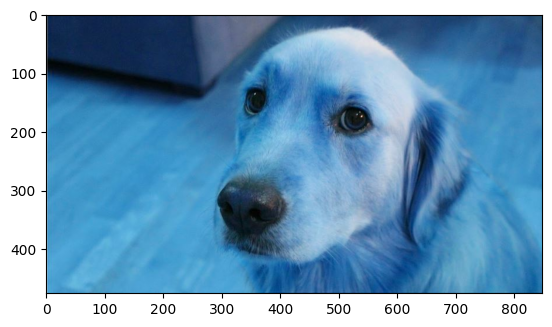

In [3]:
#show coloured image
import matplotlib.pyplot as plt

plt.imshow(image_color)

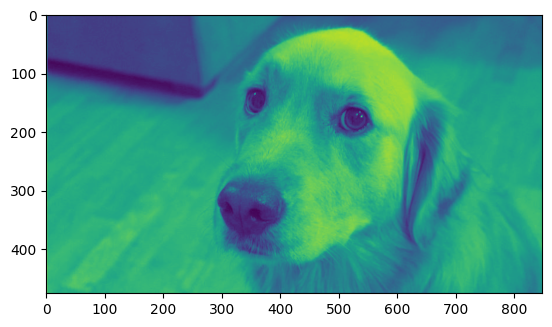

In [4]:
#show grayscale image
plt.imshow(image_grayscale)

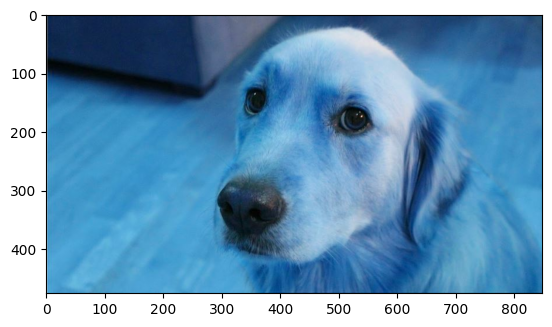

In [5]:
plt.imshow(image_uncropped)

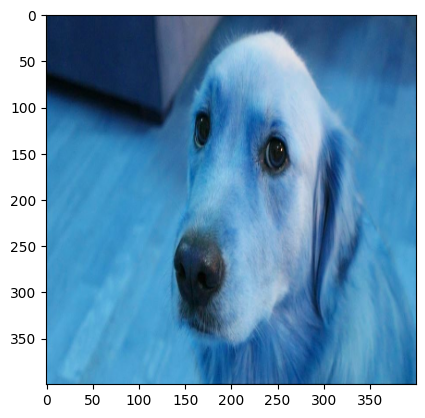

In [6]:
# resizing the image and then printing it
res_image = cv2.resize(image_color, (400, 400))
plt.imshow(res_image)

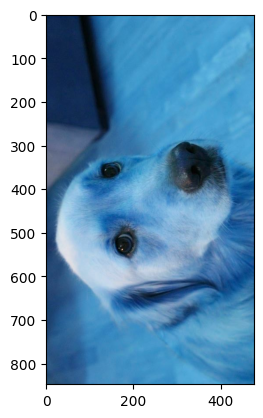

In [7]:
# transposing the image and then printing it
trans_img = cv2.transpose(image_color)
plt.imshow(trans_img)

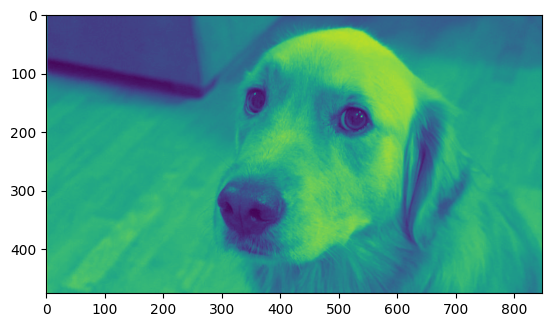

In [8]:
# gray scale image
gray_image = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

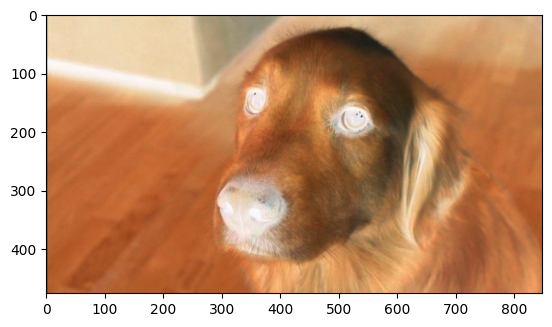

In [9]:
# inverting the color image and printing it
invert_col_img = cv2.bitwise_not(image_color)
plt.imshow(invert_col_img)

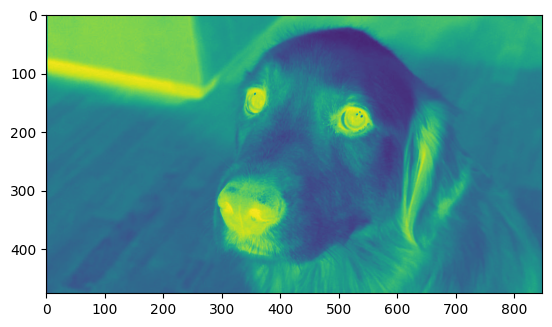

In [10]:
#inverting the gray scale image and printing it
invert_gray_img = cv2.bitwise_not(gray_image)
plt.imshow(invert_gray_img)

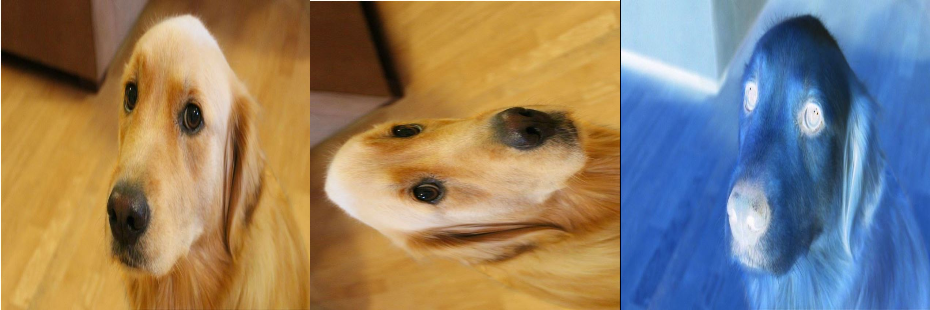

In [11]:
import numpy as np
from google.colab.patches import cv2_imshow

# Resizing all the images
size = (310, 310)
resize_img_color = cv2.resize(image_color, size)
resize_img_trans = cv2.resize(trans_img, size)
resize_img_inverted_col = cv2.resize(invert_col_img, size)

# Concatenate the resized images horizontally
horizontal_concat = np.concatenate((resize_img_color, resize_img_trans, resize_img_inverted_col), axis=1)

# Display the concatenated image
cv2_imshow(horizontal_concat)

In [12]:
#video capture object
cap = cv2.VideoCapture(0)  # Use 0 for default webcam

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

while True:
    ret, frame = cap.read()  # Read a frame from the camera
    if not ret:
        print("Error: Could not read frame.")
        break
    cv2.imshow('Video Capture', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit
        break

cap.release()  # Release the capture object
cv2.destroyAllWindows()

Error: Could not open camera.
Error: Could not read frame.


In [ ]:
#part 2

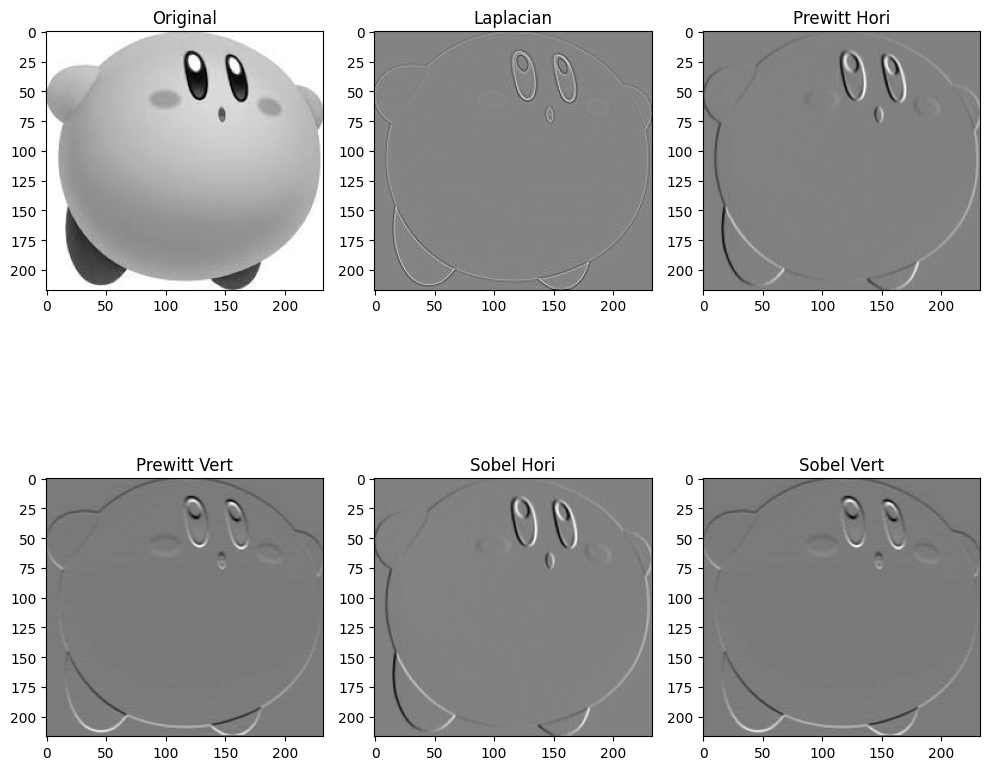

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt  # Import the pyplot module

# Load the image
img = cv2.imread('/content/drive/MyDrive/kirby.jpg', cv2.IMREAD_GRAYSCALE)

laplacian_res = cv2.Laplacian(img, cv2.CV_64F)
prewitt_hori_res = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
prewitt_vert_res = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_hori_res = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_vert_res = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
avg_result = cv2.GaussianBlur(img, (3, 3), 0)  # Applying Gaussian blur

# Display the original and filtered images
plt.figure(figsize=(10, 10))

plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(laplacian_res, cmap='gray'), plt.title('Laplacian')
plt.subplot(233), plt.imshow(prewitt_hori_res, cmap='gray'), plt.title('Prewitt Hori')
plt.subplot(234), plt.imshow(prewitt_vert_res, cmap='gray'), plt.title('Prewitt Vert')
plt.subplot(235), plt.imshow(sobel_hori_res, cmap='gray'), plt.title('Sobel Hori')
plt.subplot(236), plt.imshow(sobel_vert_res, cmap='gray'), plt.title('Sobel Vert')

plt.tight_layout()
plt.show()

In [ ]:
#part3

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_color = cv2.imread('/content/drive/MyDrive/kirby.jpg', cv2.IMREAD_COLOR)


In [3]:
# Convert to grayscale
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)



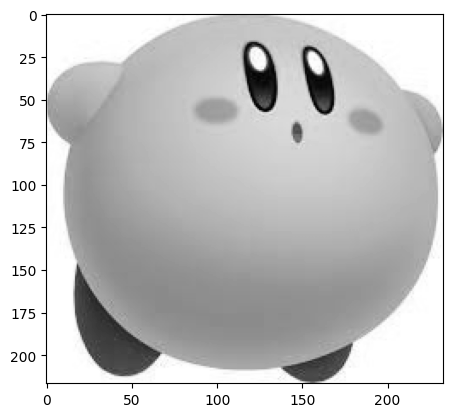

In [4]:
# Display
plt.imshow(image_gray,cmap='gray')
plt.show()

<ipython-input-9-0376eff1da9d>:4: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(crop)
<ipython-input-9-0376eff1da9d>:4: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(crop)


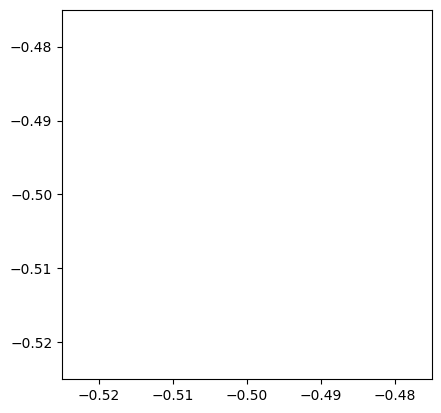

In [9]:
top_left = (280, 140)
bottom_right = (380, 30)
crop = image_gray[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
plt.imshow(crop)

<ipython-input-10-34c5e5de7d40>:4: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(crop2)
<ipython-input-10-34c5e5de7d40>:4: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(crop2)


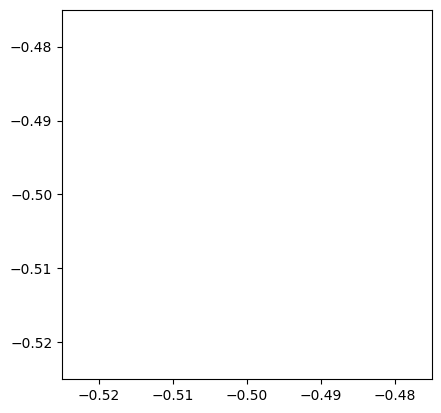

In [10]:
top_left = (420, 350)
bottom_right = (600, 700)
crop2 = image_gray[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
plt.imshow(crop2)